In [1]:
# Setup Data
%load_ext autoreload
%autoreload 2

from torch_snippets import *

# If running locally from AutoTrain/nbs
if not os.path.exists('/content') and P().resolve().stem != 'AutoTrain':
    %cd ..

# If running from colab
if os.path.exists('/content') and not os.path.exists('/content/AutoTrain'):
    !git clone https://github.com/sizhky/AutoTrain

if not P().resolve().stem == 'AutoTrain':
    %cd AutoTrain


/mnt/d04d289c-d0a7-4fd4-b883-ff227b3a8695/githubs/AutoTrain


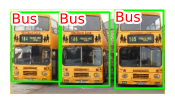

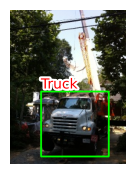

In [7]:
os.environ['CONFIG'] = 'config_object_detection.ini'
from auto_train_object_detection.infer import predict_on_folder_of_images
folder = P('open-images-bus-trucks/data/images/')
fpaths = choose(folder.Glob(), 2) # folder.sample()

for fpath, pred in predict_on_folder_of_images(fpaths):
    bbs, labels = pred
    if len(bbs) == 0: continue
    show(read(fpath,1), bbs=bbs, texts=labels, sz=2)

In [13]:
os.environ['CONFIG'] = 'config_object_detection2.ini'
import torch, onnx, torchvision
from auto_train_object_detection.infer import config, model

dummy_input = torch.randn(1,3,224,224, device='cuda')

torch.onnx.export(
    model, dummy_input, 
    f"{config.training.scheme.output_path}.onnx", 
    verbose=False
)

RuntimeError: step!=1 is currently not supported